In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [7]:
#Load Train Data
df_ = pd.read_csv("train_out.csv")
df = df_.copy()

df = df.set_index('game_id')
df = df.sort_values(by=['Year','Season_Encode'])

X = df.drop('bResult', axis=1)
y = df['bResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [9]:
#Load Test Data
data_sub = pd.read_csv("test_out.csv")
data_sub_ = data_sub.copy()

data_sub_ = data_sub_.set_index('game_id')
X_sub = data_sub_

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

#Fit model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [11]:
#Score Model
y_pred = clf_lr.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6566452701219134

In [12]:
def bet(row):
    if (row['bResult_prob_Loss'] < 0) & (row['bResult_prob_Win'] < 0) :
        return 'NO BET'
    else:
        if row['bResult'] == 1:
            return "WIN"
        else:
            return 'LOSS'

In [13]:
#Generate predictions
probs = clf_lr.predict_proba(X_sub)
predict = clf_lr.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_LR.csv')

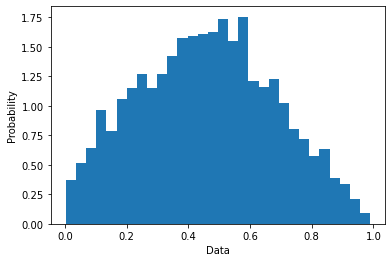

In [14]:
plt.hist(X_final['bResult_prob_Loss'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

# DecisionTreeClassifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

#Fit model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
#Score Model
y_pred = clf_dt.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.5925154492744407

In [17]:
#Generate predictions
probs = clf_dt.predict_proba(X_sub)
predict = clf_dt.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_DT.csv')

# GradientBoostingClassifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

#Fit modelhttp://localhost:8888/notebooks/S02%20-%20Data%20Wrangling/HCKT02%20-%20Data%20Wrangling/Model.ipynb#GradientBoostingClassifier
clf_gd = GradientBoostingClassifier()
clf_gd.fit(X_train, y_train)


GradientBoostingClassifier()

In [19]:
#Score Model
y_pred = clf_gd.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6535993288783698

In [20]:
#Generate predictions
probs = clf_gd.predict_proba(X_sub)
predict = clf_gd.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_GD.csv')

In [21]:
feature_importances = pd.Series(data=clf_gd.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

blue_gold              0.366933
red_gold               0.330192
gamelength             0.164214
total_kills_b_team     0.046954
total_kills_r_team     0.034721
total_towers_b_team    0.020848
total_monsters_a       0.019806
total_towers_r_team    0.008081
total_monsters_b       0.003949
Season_Encode          0.002718
Year                   0.001583
dtype: float64

# RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Fit model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [23]:
#Score Model
y_pred = clf_rf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6525802294715068

In [24]:
#Generate predictions
probs = clf_rf.predict_proba(X_sub)
predict = clf_rf.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_RF.csv')